In [14]:
import numpy as np #manipulação de matrizes
from matplotlib import pyplot as plt
# improtação classes Keras (Deep Learning)
from keras.datasets import mnist # Datasets
from keras.models import Sequential # Classes de modelos
from keras.layers import Dense, InputLayer # Estrutura das redes (camadas das redes)
from keras.layers import Dropout # CAP5 - estrutura de dropout
from keras.utils import np_utils # Utilitaria


(60000, 28, 28)
5


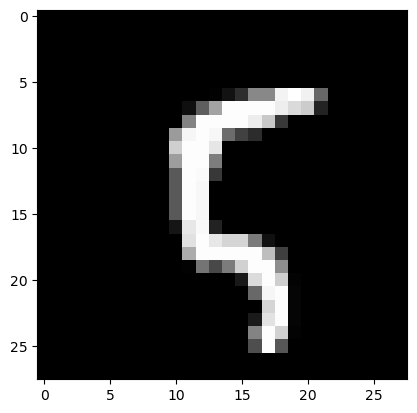

In [2]:
(X_train, y_train), (X_test, y_test) =  mnist.load_data() # Importando dataset do keras
print(X_train.shape) # Tamanho do Vetor

first_image = X_train[100] # obtem valor do velor 100
# manipulação dos dados da imagem
first_image = np.array(first_image, dtype='float')
pixels = first_image.reshape((28,28))
# exibe a imagem
plt.imshow(pixels, cmap='gray')
plt.show

print(y_train[100]) # Imprime a classe da imagem n 100

In [3]:
num_pixels = X_train.shape[1] * X_train.shape[2] # Calacula total de px da imagem
num_pixels

# transforma os valores dos px em float32
X_train2 = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test2 = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

# Normalizando valores, onde o max é 1
X_train2 = X_train2 / 255
X_test2 = X_test2 / 255

# print(first_image) # Imagem em matriz

In [4]:
# transforma os rotulos em vetores de saidas binarias
y_test_h = np_utils.to_categorical(y_test)
y_train_h = np_utils.to_categorical(y_train)

# Obtem o numero de classes do problema (saida)
num_classes = y_test_h.shape[1]

print(num_classes)
print(y_train_h[100])
print(y_test_h[100]) 

10
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [17]:
# Arquitetura da rede
# camadas = 784 x 1024 x 2048 x 10
# Pesos -> 1 camada x 2 camada = 802.816
# Bias -> valor total de neuronios
model = Sequential()
model.add(InputLayer(input_shape=num_pixels)) # camada de entrada
# Numero de neuronios 1 camada, inicializar pesos, dimensao da camada de entrada, funcao de ativacao
model.add(Dense(1024, kernel_initializer='normal', activation='relu'))
model.add(Dense(2048, kernel_initializer='normal', activation='relu'))
model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax')) # Transforma valores de saida, % softmax
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1024)              803840    
                                                                 
 dense_13 (Dense)            (None, 2048)              2099200   
                                                                 
 dense_14 (Dense)            (None, 10)                20490     
                                                                 
Total params: 2,923,530
Trainable params: 2,923,530
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # compila o modelo criado
result = model.fit(X_train2, y_train_h, validation_data=(X_test2, y_test_h), epochs=20, verbose=1, batch_size=100) # executa o treinamento

Epoch 1/20
600/600 [==============================] - 23s 37ms/step - loss: 0.0154 - accuracy: 0.9969 - val_loss: 0.1752 - val_accuracy: 0.9806
Epoch 2/20
600/600 [==============================] - 21s 34ms/step - loss: 0.0169 - accuracy: 0.9965 - val_loss: 0.1556 - val_accuracy: 0.9804
Epoch 3/20
600/600 [==============================] - 21s 35ms/step - loss: 0.0112 - accuracy: 0.9975 - val_loss: 0.1327 - val_accuracy: 0.9842
Epoch 4/20
600/600 [==============================] - 23s 38ms/step - loss: 0.0059 - accuracy: 0.9986 - val_loss: 0.1606 - val_accuracy: 0.9818
Epoch 5/20
600/600 [==============================] - 20s 34ms/step - loss: 0.0126 - accuracy: 0.9974 - val_loss: 0.1952 - val_accuracy: 0.9799
Epoch 6/20
600/600 [==============================] - 19s 32ms/step - loss: 0.0088 - accuracy: 0.9976 - val_loss: 0.1224 - val_accuracy: 0.9831
Epoch 7/20
600/600 [==============================] - 20s 33ms/step - loss: 0.0100 - accuracy: 0.9977 - val_loss: 0.1725 - val_accuracy: